<a href="https://colab.research.google.com/github/YukiAoki-GU/IoT_for_beginners/blob/main/GPIO%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPIO入門
ラズベリーパイについているGPIOピンを用いたセンサ制御について勉強しましょう。

## GPIOとは
ラズベリーパイには下の図のように40個のピンがついており，これらをセンサーに繋ぎます。
(ピン番号対応表はラズベリーパイ付属のカードにも記載されています。)
ピン位置に書いてある1-40の番号は物理ピンと呼ばれております。
それぞれのピンの用途が横に書かれてあり，主に以下に示す3つの役割があります。
- power (3.3 V $\times$ 2ケ, 5 V $\times$ 2ケ)
- Ground (8ケ)
- GPIO (28ケ)

それぞれの役割を以下で簡単に説明します。

<img src="https://github.com/YukiAoki-GU/IoT_for_beginners/blob/main/gpio_pics/GPIO-Pinout-Diagram-2.png?raw=1" width="800">

### Powerについて
5V powerからは+5 Vで一定の電圧が出続けています。センサの電源として5 Vが必要な場合はこのピンを使います。

3V3 powerからは+3.3 Vで一定の電圧が出続けています。センサの電源として3.3 Vが必要な場合はこのピンを使います。

### Groundについて
電圧を指定するには0 Vの基準が必要です。

0 Vの基準をGroundと呼びます。

センサに5 Vの入力が必要な場合は，Groundと5 Vの線をそれぞれ繋ぐ必要があります。

### GPIIOについて
センサを制御しているピンがGPIOと呼ばれるものです。

センサにシグナルを送ること，またセンサからのシグナルを受け取ることができます。

GPIOピンを使うときはまず，シグナルを送るため(OUTPUT)に使うのか，それとも受け取るため(INPUT)に使うのかを指定する必要があります。

- OUTPUTとして使う場合：

3.3 Vの出力のオン／オフを素早く切り替えることができます。

- INPUTとして使う場合：

1.3 ~ 3.3 Vの電圧が入力されると"シグナルあり"，それ以下の電圧では"シグナルなし"とみなされます。

例えば2 Vの電圧が入力された場合は"シグナルあり"とみなされるだけであり，2 Vとして読むことはできません。

ピンの配置を確認したい場合，ターミナル上で
```
pinout
```

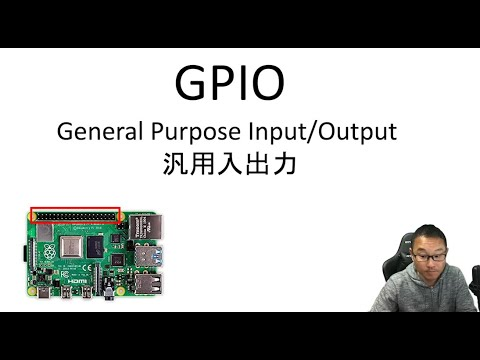

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('3G3U7_o2QAM', width=400, height=225)

---
## GPIOライブラリの準備
Pythonを使ってGPIOを制御していきます。ラズパイにデフォルトでインストールされているGPIO制御ライブラリはRPi.GPIOというものです。少し使いにくいライブラリであるため[pigpio](https://abyz.me.uk/rpi/pigpio/)を使いましょう。
pigpioのインストール手順は以下になります。
```
sudo apt -y update
sudo apt -y install python3-pigpio
sudo systemctl enable pigpiod
sudo systemctl start pigpiod
```


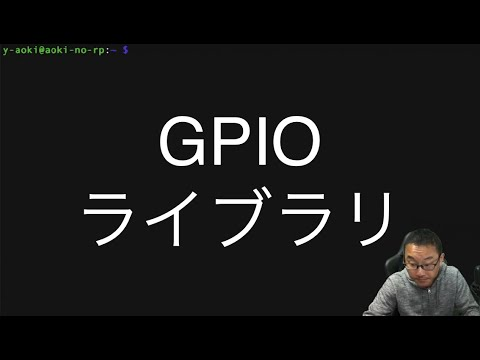

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('-1i8yRhBeqE', width=400, height=225)

---
## 0 or 1を出す(読む)

ライブラリの準備
```
import pigpio # pigpioライブラリの読み込み
pi = pigpio.pi() # pigpioの準備
```

0 or 1をGPIO 3に出す
```
pi.set_mode(3, pigpio.OUTPUT) # GPIO 3を出力に設定
pi.write(3, 1)    # GPIO 3をON(=1), OFF(=0)
```

GPIO 4から0 or 1を読む
```
pi.set_mode(4, pigpio.INPUT) # GPIO 4を入力に設定
print(pi.read(4))    # GPIO 4を読む
```

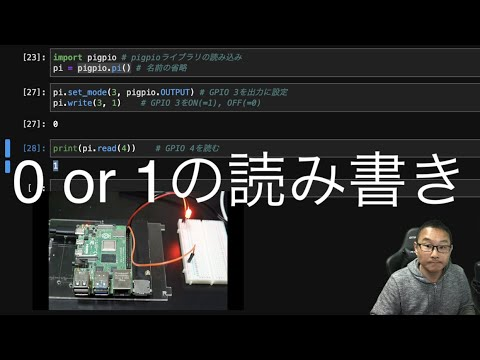

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZXDcyfy3yVs', width=400, height=225)

## 練習問題1
以下のコードは0から9までを1秒ごとに出力するコードである。\
このコードを元に，1秒ごとに10回点滅を繰り返すコードを書きなさい。\
GPIOピンは3を用いなさい。

```
import pigpio  # pigpioライブラリの読み込み
import time    # 時間操作のためのライブラリ

# pigpioの初期化
pi = pigpio.pi()  # pigpioの準備
GPIO_PIN = 13 #GPIOピンの指定

try:
    for i in range(10):        # 0から9までiを1ずつ増加
        print(i)               #iを出力
        time.sleep(1)          # 1秒間待機
finally:
    pi.write(GPIO_PIN, 0)  # 終了時にGPIOをOFF
    pi.stop()              # pigpioの終了
```

---
## 0.1を出す(PWM)
0 or 1ではなく0.1などを出力したい時の方法としてPWM (Pulse Width Modulation)という方法があります。PWM用のハードウェアクロックが使えるピンはGPIO 12 or 13です。書式は以下のようです。
```
pi.hardware_PWM("ピン番号", "周波数"，"duty比[%] * 10000")
```

例として，GPIO 12，周波数=1 KHz，duty比=10 %の時のコマンドは以下です。
```
pi.hardware_PWM(12, 1000, 10 * 10000)
```

PWMを終了するには
```
pi.write(12, 0)
```

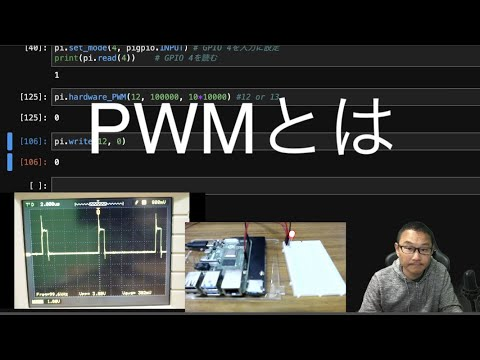

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('S4xhz9cqaSU', width=400, height=225)

---
## シリアル通信
次にアルファベットのような文字列を送るにはどうすれば良いでしょうか？
例えば'a'を2進数で表すと以下のようになります。

In [ ]:
print(bin(ord('a'))) # アスキーコードを2進数

0b1100001


最初の'0b'の後の'1100001'が'a'を表します。

1100010 = b

1100011 = c

のようになります。これらを送る方法として7個のGPIOピンを使い，7桁の数字を送る方法が考えられ，この方法を7 bitの「パラレル通信」と言います。一方で使用するGPIOピンは1本(1 bit通信)で数字を順々に送る方法も考えられ，この方法を「シリアル通信」と言います。ここではシリアル通信について勉強します。

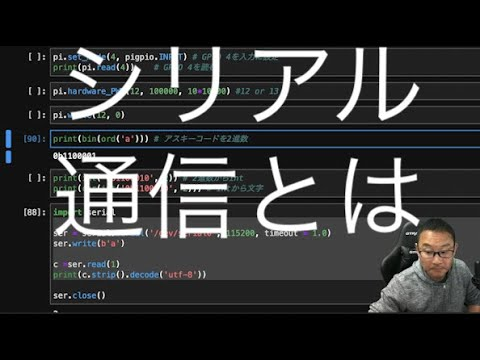

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('b0dBM6kwXfo', width=400, height=225)

---
### 非同期型シリアル通信(UART)

#### UART通信をするための準備
シリアル通信の1つであるUART通信を行ってみましょう。そのための準備をします。まずはターミナルからシリアル通信用のライブラリをインストールしましょう。
```
sudo apt -y install python3-serial
```
次にraspi-configでシリアル通信の設定を変更し，再起動します。

```
sudo raspi-config
```
3 Interface Options > I6 Serial Port

"Would you llike a login shell to be accesible over serial?"

No

Would you like the serial port hardware to be enabled?

Yes

その後，再起動します。

再起動後，以下のコマンドにより/dev/serial0がUARTを使えるように変更します。
```
sudo sh -c "echo 'dtoverlay=miniuart-bt' >> /boot/config.txt"
sudo sh -c "echo 'core_freq=250' >> /boot/config.txt"
```

その後，もう一度再起動しましょう。
```
sudo reboot
```
再起動後，以下のコマンドで /dev/serial0が ttyAMA0(普通のUART)となれば成功です。
```
ls -l /dev/serial*
```
lrwxrwxrwx 1 root root 5 Mar 15 12:37 /dev/serial0 -> ttyAMA0

lrwxrwxrwx 1 root root 7 Mar 15 12:37 /dev/serial1 -> ttyS0

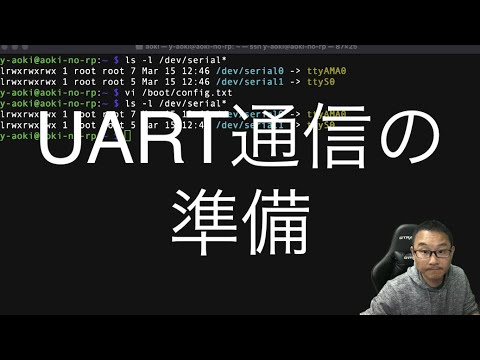

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('KuE4vsM4kFk', width=400, height=225)

---
#### UART通信をしてみよう



GPIO 14(TXD: 送信)，GPIO 15(RXD: 受信)

In [ ]:
import serial

#送る
ser = serial.Serial('/dev/serial0', 115200, timeout = 1.0)
ser.write(b'a')

#読む
c =ser.read(1)
print(c.strip().decode('utf-8'))

ser.close()

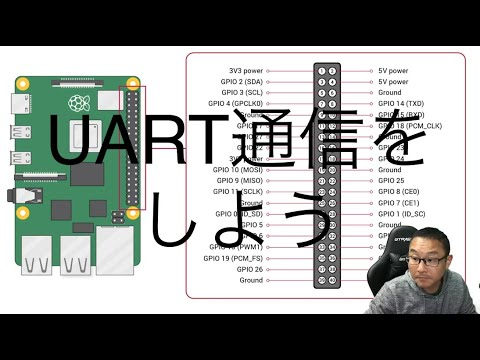

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('0IFU43HlaeQ', width=400, height=225)

---
### 同期型シリアル通信(I2C，SPI)
UART通信に必要なのはシグナル線だけでした。クロック線を追加して時刻を合わせることで同期型の通信をすることができるようになります。同期型のシリアル通信としてよく使われるのがI2CやSPIになります。クロックを出す機器がマスター，その他の機器がスレーブとして，マスターとスレーブ間の通信として動作します。また，スレーブとして複数の機器を接続可能であるため，スレーブにはアドレスの概念が発生します。

ラズパイ1台だけでマスターとスレーブの両方の役割を同時に果たすことはできないため，同期型のシリアル通信については実演は行わず説明のみとします。

#### I2C通信
- SCL: シリアルクロック (GPIO 3)
- SDA: シリアルデータ (GPIO 2)

#### SPI通信
- SCLK: シリアルクロック (GPIO 11)
- MISO: マスターイン・スレーブアウト (GPIO 9)
- MOSI: マスターアウト・スレーブイン (GPIO 10)
- SS: スレーブセレクト (GPIO 8, GPIO 7)

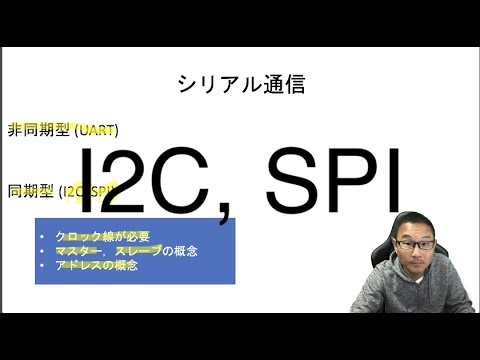

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('_er90kvRzas', width=400, height=225)

---
# クロックについて(そのうち作る)

以下のコマンドでGPIOの種類がbcm2835だと分かる。
```
dmesg | grep gpiomem
```